In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r"C:\Users\yoga\Documents\deep_learning\mine work\mini project\train.csv\train.csv")
print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [8]:
data = np.array(data)
row, col = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T   # Make a column vector
Y_dev = data_dev[0]
x_dev = data_dev[1:col]

data_train = data[1000:row].T
Y_train = data_train[0]
X_train = data_train[1:col]
X_train = X_train / 255.
_,col_train = X_train.shape

In [9]:
X_train.shape

(784, 41000)

In [10]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5    # Shape is 10*784 and will genrate no. between -0.5 and 0.5
  b1 = np.random.rand(10,1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5   # 10 classes
  b2 = np.random.rand(10,1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(0,Z)

def softmax(Z):
  # return np.exp(Z)/np.sum(np.exp(Z))
  expZ = np.exp(Z-np.max(Z, axis=0))
  return expZ/np.sum(expZ, axis=0)

def forward_prop(W1, b1, W2, b2, X):
  Z1 = np.dot(W1,X) + b1
  A1 = ReLU(Z1)
  Z2 = np.dot(W2,A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T   # We flip because each row is an example and we want it the other way
  return one_hot_Y

def deriv_ReLU(Z):
  return Z>0    # Returns 0 or 1 based on input

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * np.dot(dZ2, A1.T)
  db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = np.dot(W2.T, dZ2) * deriv_ReLU(Z1)
  dW1 = 1/m * np.dot(dZ1, X.T)
  db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1 , db1, dW2, db2, alpha):
  W1 = W1 - alpha*dW1
  b1 = b1 - alpha*db1
  W2 = W2 - alpha*dW2
  b2 = b2 - alpha*db2
  return W1, b1, W2, b2

In [11]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y)/Y.size

def gradient_descent(X, Y, iterations, alpha):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if (i%50 == 0):
      print("Iteration: ", i)
      print("Accuracy: ", get_accuracy(get_predictions(A2), Y))

  return W1, b1, W2, b2

In [12]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[2 2 2 ... 5 3 9] [0 3 4 ... 7 9 1]
Accuracy:  0.088
Iteration:  50
[0 7 4 ... 5 4 1] [0 3 4 ... 7 9 1]
Accuracy:  0.5849268292682926
Iteration:  100
[0 7 4 ... 7 4 1] [0 3 4 ... 7 9 1]
Accuracy:  0.7213170731707317
Iteration:  150
[0 7 4 ... 7 9 1] [0 3 4 ... 7 9 1]
Accuracy:  0.7736341463414634
Iteration:  200
[0 7 4 ... 7 9 1] [0 3 4 ... 7 9 1]
Accuracy:  0.8009756097560976
Iteration:  250
[0 7 4 ... 7 9 1] [0 3 4 ... 7 9 1]
Accuracy:  0.8189268292682926
Iteration:  300
[0 7 4 ... 7 9 1] [0 3 4 ... 7 9 1]
Accuracy:  0.8307317073170731
Iteration:  350
[0 7 4 ... 7 9 1] [0 3 4 ... 7 9 1]
Accuracy:  0.8396585365853658
Iteration:  400
[0 7 4 ... 7 9 1] [0 3 4 ... 7 9 1]
Accuracy:  0.8472682926829268
Iteration:  450
[0 7 4 ... 7 9 1] [0 3 4 ... 7 9 1]
Accuracy:  0.8542682926829268


In [13]:
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = get_predictions(A2)
  return predictions

def test_predictions(index, W1, b1, W2, b2):
  current_image = X_train[:, index, None]
  prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
  label = Y_train[index]
  print("Predictions: ", prediction)
  print("Label: ", label)

  current_image = current_image.reshape((28,28))*255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

Predictions:  [0]
Label:  0


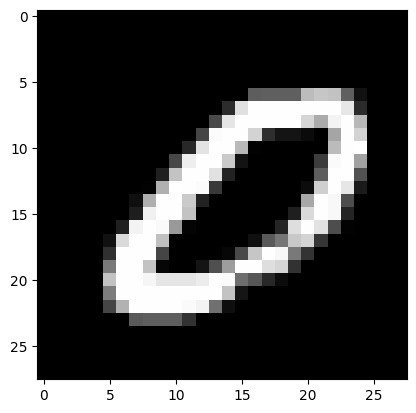

In [14]:
test_predictions(0, W1, b1, W2,b2)

In [15]:
def confusion_matrix(y_true, y_pred):
    unique_labels = sorted(list(set(y_true + y_pred)))
    label_to_index = {label: i for i, label in enumerate(unique_labels)}
    num_classes = len(unique_labels)

    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true_label, predicted_label in zip(y_true, y_pred):
        true_idx = label_to_index[true_label]
        predicted_idx = label_to_index[predicted_label]
        conf_matrix[true_idx, predicted_idx] += 1
    return conf_matrix, unique_labels

In [16]:
predictions = make_predictions(X_train, W1, b1, W2, b2)
conf_matrix, labels = confusion_matrix(list(Y_train), list(predictions))

In [17]:
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

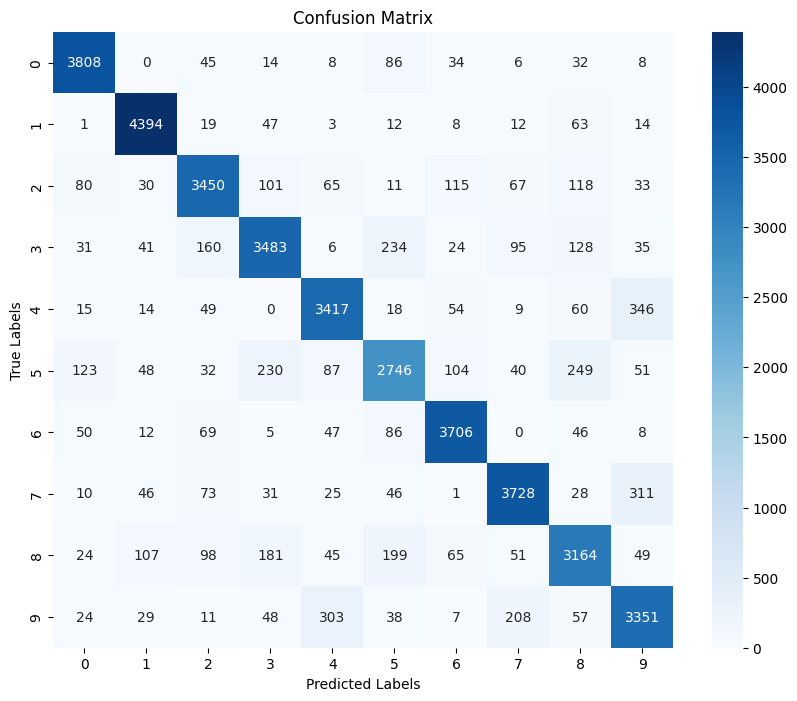

In [18]:
plot_confusion_matrix(conf_matrix, labels)